# TCSS 588 In-class Exercise: Correlation and linear regression

These exercises will be used to illustrate how to perform data analyses using R.
Alternatively, you can use R or Rstudio. 
I assume you will learn basic R commands on your own.

Credit: The data and ideas behind these exercises and homeworks are from the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.
http://www.maayanlab.net/crowdsourcing/megatask1.php

The overarching goal is to predict adverse drug reactions. But we will take this task step by step. You will learn more about the meanings of these data in future lectures. For illustrative purposes in today’s class, just treat these data as numbers in a matrix.

## 1. Download and read in data (same as lecture 2)
Download the data “gene_expression_n438x978.txt” from canvas to your computer.  I have removed the first character (#) and an ‘ from the input file to make R happy.

In [1]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
dim (my.data)
my.data[1:5, 1:5]

[1] 438 978

,PSME1,ATF1,RHEB,FOXO3,RHOA
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959


## 2. Correlation (same as lecture)

In [2]:
cor (my.data[,1], my.data[, 2])

[1] 0.02669966

## 3. Pairwis correlation

_Your task 1:_ What is the maximum correlation coefficient among all possible pairs of genes?  How about the minimum correlation?  

_Q:_ Can you get away from doing a double nested loop in R?
Discuss with your neighbors.

Note that the total number of possible gene pairs = 978*977/2 = 477,753

_Your task 2:_ write a R script. For computationally intensive tasks, you might want to consider running your R code in batch mode.  https://www.r-bloggers.com/batch-processing-vs-interactive-sessions/

Hint: There are many ways to do this. You can use a loop or you might want to check out
http://www.r-bloggers.com/using-apply-sapply-lapply-in-r/


In [3]:
curr.max <- -1
curr.min <- 1
for (i in 1:ncol(my.data)) {
    #for (j in (i+1):ncol(my.data)) {
        # ret.cor <- cor (my.data[, i], my.data[,j])
        ret.cor <- apply (my.data[, -i], 2, function (x){cor(my.data[,i], x)})
        curr.max <- max(c(curr.max, ret.cor))
        curr.min <- min(c(curr.min, ret.cor))
   # }
}
print (paste("curr max = ", curr.max, sep=""))
print (paste("curr min = ", curr.min, sep=""))

[1] "curr max = 0.52272128511618"
[1] "curr min = -0.765502866721526"


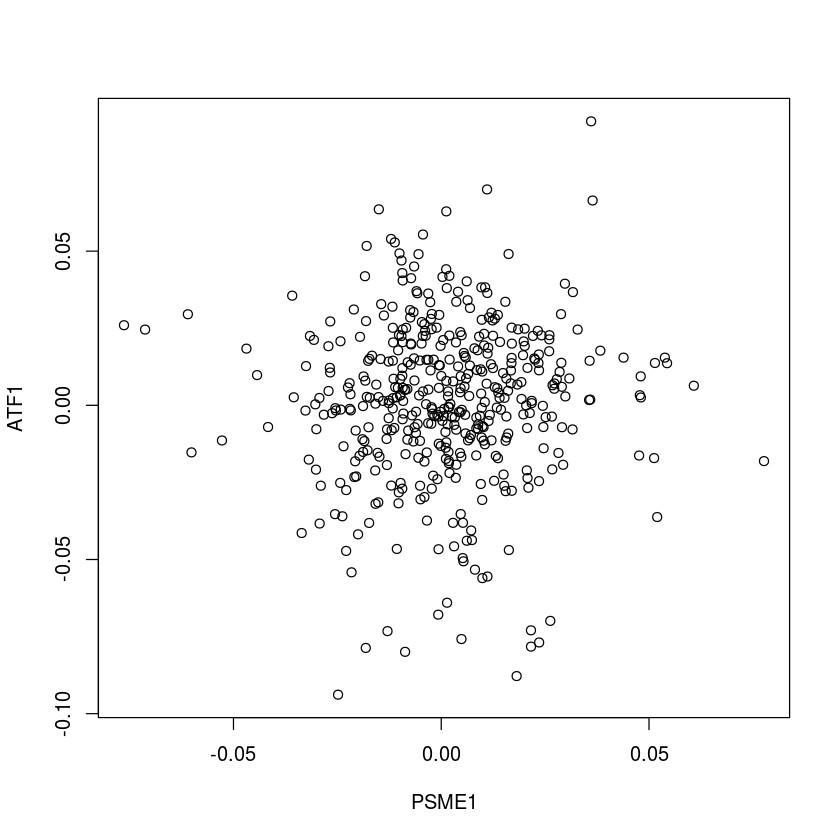

In [4]:
plot (my.data[,1], my.data[,2], xlab="PSME1", ylab="ATF1")

In [5]:
cor (my.data$UBE2C, my.data$CDK1)

[1] 0.5227213

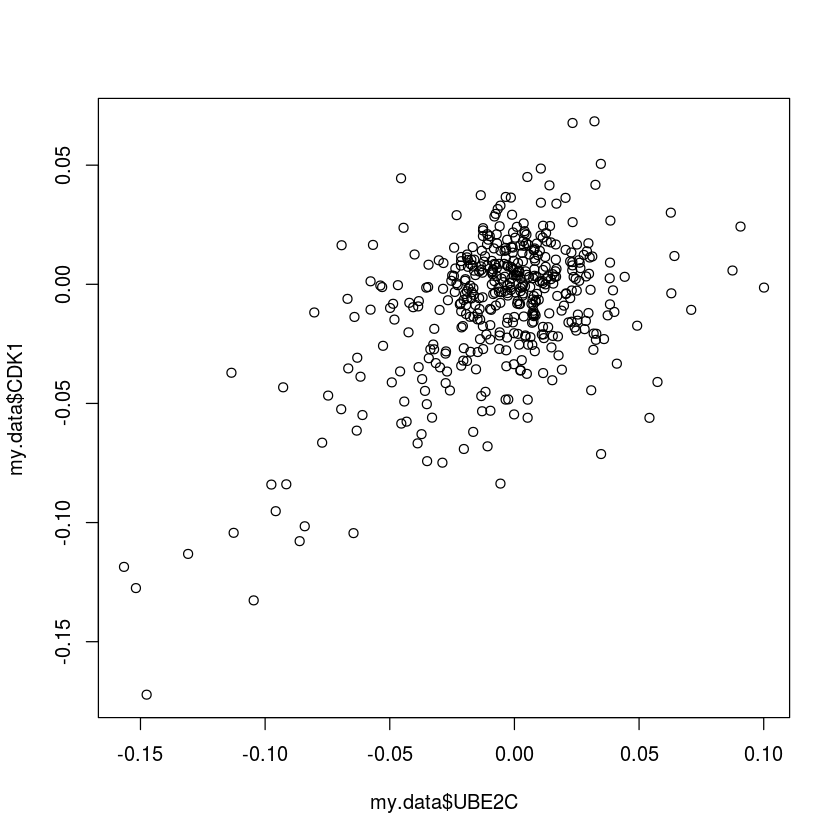

In [6]:
plot (my.data$UBE2C, my.data$CDK1)

## 4. Linear Regression

In [7]:
help (lm)

In [8]:
lmFit1 <- lm(my.data$CDK1 ~ my.data$UBE2C)
summary (lmFit1)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096025 -0.014247  0.003149  0.017000  0.071622 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005261   0.001214  -4.336 1.81e-05 ***
my.data$UBE2C  0.480930   0.037563  12.803  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02491 on 436 degrees of freedom
Multiple R-squared:  0.2732,	Adjusted R-squared:  0.2716 
F-statistic: 163.9 on 1 and 436 DF,  p-value: < 2.2e-16


In [9]:
(0.52272128511618)^2

[1] 0.2732375

In [10]:
# recall that correlation is equal to the sqrt (R-squared)
sqrt(0.2732)

[1] 0.5226854

In [11]:
coefficients (lmFit1)

(Intercept) my.data$UBE2C 
 -0.005261415   0.480930215

In [12]:
coefficients (lmFit1)[1]

(Intercept) 
-0.005261415

In [13]:
coefficients (lmFit1)[2]

my.data$UBE2C 
    0.4809302

In [14]:
predict.lmFit1 <- predict (lmFit1)
predict.lmFit1

1             2             3             4             5 
-7.773099e-03 -1.511643e-02 -1.726771e-02  1.036767e-02 -1.170592e-02 
            6             7             8             9            10 
-1.266865e-03 -1.436746e-02 -6.542832e-03 -6.853536e-03 -1.305685e-02 
           11            12            13            14            15 
 5.797723e-03  6.892715e-03 -7.054738e-03 -2.452015e-02 -4.571061e-02 
           16            17            18            19            20 
-2.216179e-02 -9.346294e-03 -9.623844e-03  6.564038e-03 -1.154769e-02 
           21            22            23            24            25 
-5.930274e-03 -1.133412e-02 -1.553733e-02 -2.191097e-02 -2.219491e-03 
           26            27            28            29            30 
-1.178123e-03 -6.153621e-03 -1.915419e-02 -3.254498e-02 -1.047793e-02 
           31            32            33            34            35 
 3.835392e-02 -1.479730e-02 -4.768922e-03  6.651921e-03 -8.945497e-03 
           36            37            38            39            40 
-1.808617e-02 -1.093341e-02 -6.478671e-03 -1.621136e-02  9.011081e-03 
           41            42            43            44            45 
 1.053750e-02 -8.658863e-03  6.352742e-03 -5.942501e-02  9.258221e-03 
           46            47            48            49            50 
-7.139469e-03 -4.783296e-03 -3.457690e-02  7.193972e-03  1.497348e-03 
           51            52            53            54            55 
-3.611716e-02 -8.171480e-03 -9.922407e-03 -2.866353e-02 -6.822604e-03 
           56            57            58            59            60 
 3.491613e-04  3.081921e-05 -1.165397e-02 -3.616732e-04 -7.621137e-02 
           61            62            63            64            65 
 2.491089e-02  1.202058e-02  1.325298e-02 -2.115354e-02  1.980894e-04 
           66            67            68            69            70 
-1.130355e-02 -1.412276e-03  7.463779e-03  4.715335e-03 -8.603621e-03 
           71            72            73            74            75 
 2.771079e-04 -6.682935e-03 -1.389449e-03 -2.569148e-02 -6.858887e-03 
           76            77            78            79            80 
-9.002972e-03 -1.235288e-02  7.575787e-04 -9.918338e-03 -2.713245e-02 
           81            82            83            84            85 
-1.703324e-04  7.271027e-04 -1.518612e-04 -1.266952e-02  2.597634e-04 
           86            87            88            89            90 
-1.559350e-02 -2.226990e-02 -1.501623e-02 -1.384602e-02  5.770644e-03 
           91            92            93            94            95 
-5.522463e-03 -1.563366e-02 -5.938844e-03 -6.966740e-03  5.951306e-03 
           96            97            98            99           100 
-1.546448e-02 -1.520434e-02 -2.993233e-03 -3.310648e-03 -8.243558e-03 
          101           102           103           104           105 
-2.042576e-02 -8.878847e-03  1.226660e-03  3.680773e-02  8.278660e-03 
          106           107           108           109           110 
 9.759092e-03 -3.301246e-02 -1.826103e-02  9.550010e-03 -5.993198e-03 
          111           112           113           114           115 
-4.805101e-03 -5.280042e-03 -8.679722e-03 -1.233714e-02 -3.860128e-02 
          116           117           118           119           120 
-5.753567e-04  1.455275e-03 -4.377527e-03  6.986660e-03  1.949836e-04 
          121           122           123           124           125 
-2.840914e-02  6.162617e-03 -8.122125e-03 -1.328461e-03  1.272742e-02 
          126           127           128           129           130 
-1.551909e-02 -1.316418e-02 -5.365385e-03  1.145631e-02  5.509241e-04 
          131           132           133           134           135 
-1.084498e-02 -5.214993e-02 -1.377324e-02 -1.816516e-03 -1.162339e-03 
          136           137           138           139           140 
 1.339928e-04 -1.318613e-02  1.317902e-02  1.775689e-03 -1.985430e-02 
          141           142         

In [15]:
temp1 <- 1:4
temp2 <- 2:5
temp1 - temp2
sum ((temp1 - temp2)^2)

[1] -1 -1 -1 -1

[1] 4

In [16]:
# compute RSS as the sum of the squared differences between the actual value and predicted values of y_i 
curr.RSS <- sum((my.data$CDK1 - predict.lmFit1)^2)
curr.RSS

[1] 0.2705229

In [17]:
curr.RSE <- sqrt (curr.RSS/436)
curr.RSE

[1] 0.02490914

In [18]:
# recall that TSS is equal to the sum of squared differences between the actual y_i and mean (y)
curr.TSS <- sum((my.data$CDK1- mean(my.data$CDK1))^2)
curr.TSS

[1] 0.3722301

In [19]:
1 - curr.RSS/curr.TSS

[1] 0.2732375

In [20]:
lmFit1$coefficients

(Intercept) my.data$UBE2C 
 -0.005261415   0.480930215

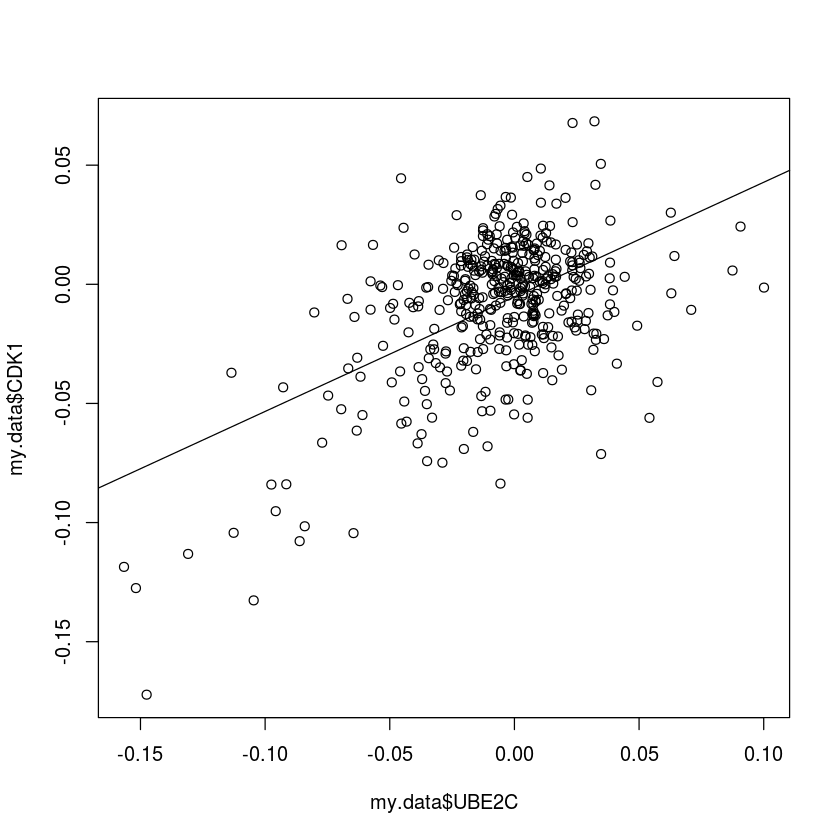

In [21]:
plot (my.data$UBE2C, my.data$CDK1)
abline (lmFit1)

In [22]:
lmFit2 <- lm(my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)
summary (lmFit2)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095512 -0.014494  0.003057  0.016405  0.067388 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005638   0.001208  -4.666 4.10e-06 ***
my.data$UBE2C  0.465947   0.037439  12.446  < 2e-16 ***
my.data$ATF1   0.187601   0.045325   4.139 4.19e-05 ***
my.data$RHOA   0.004271   0.051644   0.083    0.934    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02449 on 434 degrees of freedom
Multiple R-squared:  0.3008,	Adjusted R-squared:  0.296 
F-statistic: 62.25 on 3 and 434 DF,  p-value: < 2.2e-16


Your task: pick a 4th gene to add to the model. Does this additional variable improve the fit of the model?

## adverse drug reaction (0/1) data

Our first task is to read in the ADR matrix.

In [23]:
adr.mat <- read.table ("ADRs_HLGT_n438x232.txt", sep="\t", header=T)
dimnames(adr.mat)[[1]] <- adr.mat [, 1]
adr.mat <- adr.mat[, -1]
dim (adr.mat)

[1] 438 232

In [24]:
adr.mat[1:5, 1:6]

,Abdominal.hernias.and.other.abdominal.wall.conditions,Abortions.and.stillbirth,Acid.base.disorders,Administration.site.reactions,Adrenal.gland.disorders,Age.related.factors
ACETAZOLAMIDE,0,0,1,1,0,0
IRBESARTAN,0,0,0,0,1,0
IPRATROPIUM BROMIDE,0,0,0,0,1,0
EFAVIRENZ,0,0,0,0,1,1
THIAMINE,0,0,0,0,0,0


### Your task: how would you explore this adr.mat matrix?  This is a binary matrix. How sparse is this matrix?

In [25]:
# how many drugs have adverse side reaction in this matrix?
sum (adr.mat)/(nrow(adr.mat) * ncol(adr.mat))

[1] 0.2674972

In [26]:
num.ADR.per.drug <- apply (adr.mat, 1, sum)

In [27]:
length (num.ADR.per.drug)

[1] 438

In [28]:
num.ADR.per.drug

ACETAZOLAMIDE                             IRBESARTAN 
                                    47                                     66 
                   IPRATROPIUM BROMIDE                              EFAVIRENZ 
                                    58                                    108 
                              THIAMINE                              IOXAGLATE 
                                    17                                     44 
                             ARTICAINE                               IOVERSOL 
                                    41                                     59 
                             DONEPEZIL                            DOMPERIDONE 
                                   142                                     36 
                           OXICONAZOLE                              DOXAZOSIN 
                                     7                                    121 
                           DORZOLAMIDE                           LENALIDOMIDE 
                                    69                                    147 
                         NORTRIPTYLINE                         LEVONORGESTREL 
                                    64                                     95 
                           REPAGLINIDE                            NORFLOXACIN 
                                    36                                     51 
                             DIAZOXIDE                           FLURBIPROFEN 
                                    83                                    121 
                             FLUTAMIDE                           CARISOPRODOL 
                                    50                                     24 
                              DIAZEPAM                            CYPROTERONE 
                                    72                                    101 
                          BICALUTAMIDE                           PROMETHAZINE 
                                   105                                     52 
                           BETHANECHOL                             MICONAZOLE 
                                    17                                     20 
                          LOMEFLOXACIN                              MUPIROCIN 
                                   107                                      6 
                              RAMIPRIL                              ESTRADIOL 
                                    85                                    135 
                            RALOXIFENE                              EPHEDRINE 
                                    57                                     24 
                            KETOPROFEN                             INDAPAMIDE 
                                    79                                     91 
                           NAPHAZOLINE                             VIGABATRIN 
                                    18                                    107 
                 DISODIUM CROMOGLYCATE                               PROPOFOL 
                                    53                                     72 
                          PIOGLITAZONE                             IFOSFAMIDE 
                                    35                                     78 
                             INDINAVIR                         NORETHISTERONE 
                                    49                                     44 
                           TRIAMTERENE                             IMIPRAMINE 
                                    16                                     66 
                            ALPRAZOLAM                              SORAFENIB 
                                    78                                     87 
                              CEFEPIME                             FEBUXOSTAT 
                                    47                                    100 
                           RISPERIDONE                     HEXAMETHYLMELAMI

In [29]:
# are there any drugs with no ADR
sum (num.ADR.per.drug == 0)

[1] 2

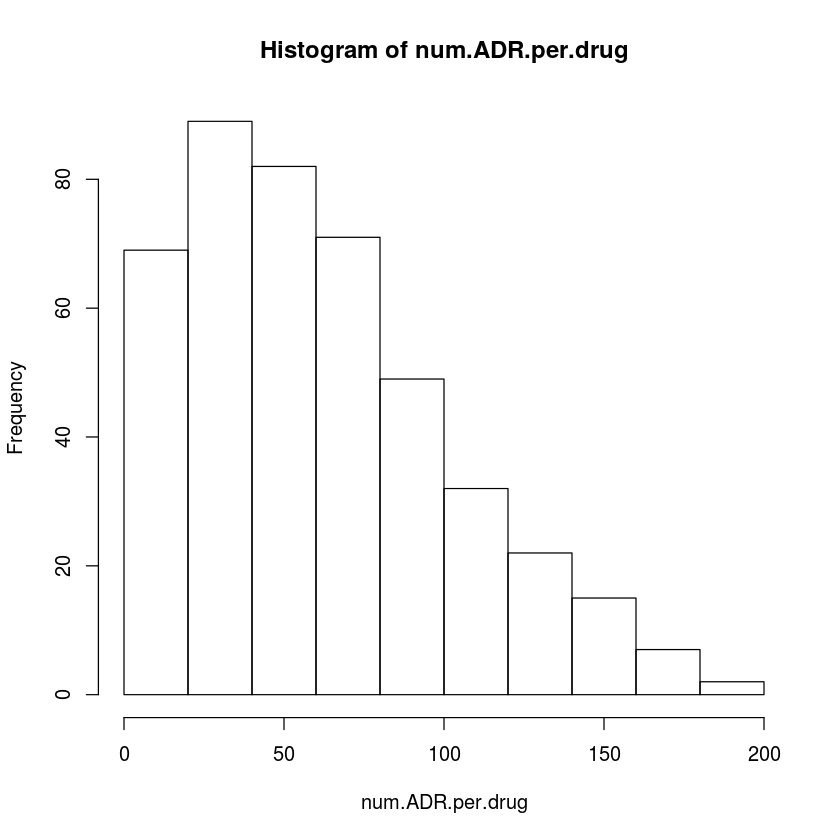

In [30]:
hist (num.ADR.per.drug)

In [31]:
which (num.ADR.per.drug == 0)

HEXACHLOROPHENE       ECONAZOLE 
             97             438

## Exercise: are there any side effects that are not associated with any of the 438 drugs? What is the average number of drugs associated with each side effects?

## Logistic regression

### Is CDK1 predictive of heart failures?

In [32]:
adr.mat[1:5, 100:101]

,Heart.failures,Hepatobiliary.investigations
ACETAZOLAMIDE,0,0
IRBESARTAN,1,1
IPRATROPIUM BROMIDE,0,0
EFAVIRENZ,1,1
THIAMINE,1,0


In [33]:
sum (adr.mat[, 100])

[1] 215

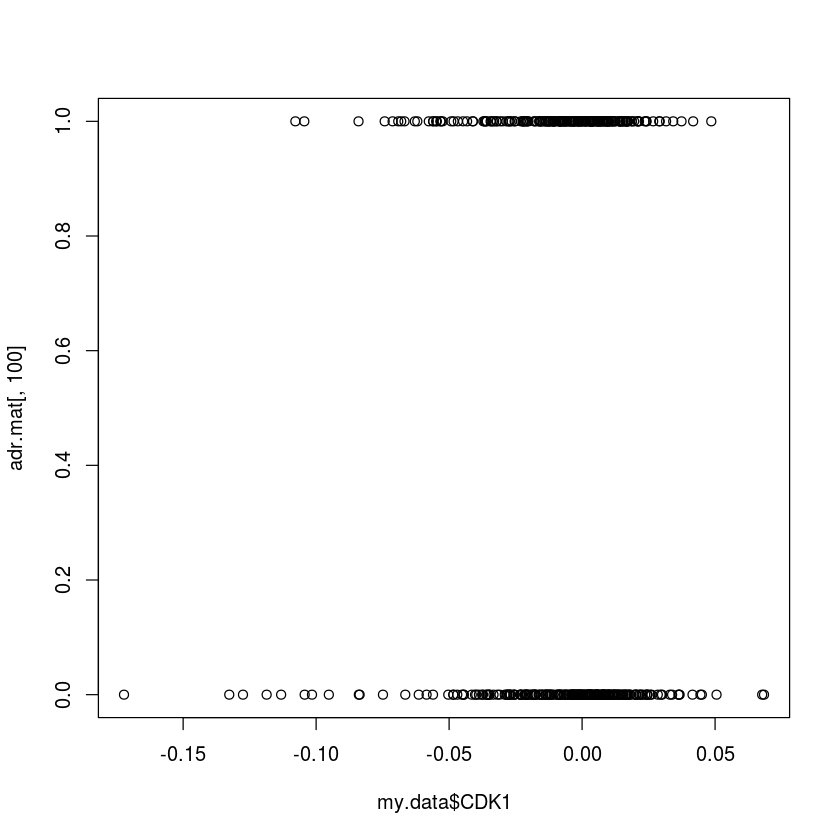

In [34]:
plot (my.data$CDK1, adr.mat[,100])

In [35]:
glmFit1 <- glm (adr.mat[, 100] ~ my.data$CDK1, family=binomial)
summary (glmFit1)


Call:
glm(formula = adr.mat[, 100] ~ my.data$CDK1, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.176  -1.161  -1.157   1.193   1.198  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.03821    0.09937  -0.384    0.701
my.data$CDK1 -0.20154    3.27850  -0.061    0.951

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 607.05  on 437  degrees of freedom
Residual deviance: 607.05  on 436  degrees of freedom
AIC: 611.05

Number of Fisher Scoring iterations: 3


In [36]:
ret.pred <- predict (glmFit1, type="response")
ret.pred[1:10]

1         2         3         4         5         6         7         8 
0.4903292 0.4920630 0.4902640 0.4883470 0.4900717 0.4899533 0.4898201 0.4911656 
        9        10 
0.4918459 0.4901618

In [37]:
coef (glmFit1)

(Intercept) my.data$CDK1 
 -0.03820503  -0.20154136

In [38]:
x.vec <- my.data$CDK1[1:10]
curr.val <- coef(glmFit1)[[1]] + coef(glmFit1)[[2]]*x.vec

In [39]:
curr.exp <- exp (curr.val)
my.pred <- curr.exp / (1+curr.exp)
my.pred

[1] 0.4903292 0.4920630 0.4902640 0.4883470 0.4900717 0.4899533 0.4898201
 [8] 0.4911656 0.4918459 0.4901618

## We learned that CDK1 is not predictive of heart failures. Our next goal is to find which genes are predictive of heart failures.

In [40]:
my.data.sub1 <- data.frame (my.data$UBE2C, my.data$ATF1, my.data$RHOA)

In [41]:
help (glm)

In [42]:
glmFit2 <- glm (adr.mat[, 100] ~ ., data=my.data.sub1, family=binomial)
summary (glmFit2)


Call:
glm(formula = adr.mat[, 100] ~ ., family = binomial, data = my.data.sub1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.255  -1.164  -1.093   1.190   1.273  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -0.03370    0.09875  -0.341    0.733
my.data.UBE2C -0.06150    3.05966  -0.020    0.984
my.data.ATF1   1.45205    3.70720   0.392    0.695
my.data.RHOA  -1.98312    4.22539  -0.469    0.639

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 607.05  on 437  degrees of freedom
Residual deviance: 606.68  on 434  degrees of freedom
AIC: 614.68

Number of Fisher Scoring iterations: 3


In [43]:
pred2 <- predict (glmFit2, type="response")
pred2[1:10]

1         2         3         4         5         6         7         8 
0.4774556 0.5015924 0.4889556 0.5280437 0.4918603 0.5079233 0.4919311 0.4629992 
        9        10 
0.4992916 0.4974919

In [44]:
temp <- table (adr.mat[, 100], round (pred2))
temp
temp[1,1]

   
      0   1
  0 170  53
  1 156  59

[1] 170

In [45]:
# number of predicted Y=1
sum (round(pred2))

[1] 112

In [46]:
# number of correct predictions
170 + 59

[1] 229

## 4/9/18 in class - model selection

### use model selection strategies to identify "good" models predictive of heart failure, sticking with the first 20 genes

### first setup a data frame

In [47]:
my.data.sub2 <- data.frame (my.data[, 1:20])
glmfit3 <- glm (adr.mat[,100] ~ ., data=my.data.sub2, family=binomial)
summary (glmfit3)


Call:
glm(formula = adr.mat[, 100] ~ ., family = binomial, data = my.data.sub2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6615  -1.1104  -0.7127   1.1536   1.7457  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.03567    0.10927  -0.326   0.7441  
PSME1         6.05804    5.37446   1.127   0.2597  
ATF1          1.14801    4.11455   0.279   0.7802  
RHEB         -4.35964    8.61841  -0.506   0.6130  
FOXO3        -1.12052    4.10888  -0.273   0.7851  
RHOA         -1.75320    4.72304  -0.371   0.7105  
IL1B         -5.27850    3.40098  -1.552   0.1207  
ASAH1         4.15862    4.59418   0.905   0.3654  
RALA         -5.12087    4.63029  -1.106   0.2687  
ARHGEF12      5.49088    4.76950   1.151   0.2496  
SOX2         -6.24835    4.44617  -1.405   0.1599  
SERPINE1      4.86191    3.49889   1.390   0.1647  
HLA.DMA      -2.12271    4.63724  -0.458   0.6471  
EGF         -10.42348    5.07607  -2.053   0.0400 *
APP       

In [48]:
# fit a null model without any predictors, intercept only
glmfit4 <- glm (adr.mat[,100] ~ 1, data=my.data.sub2, family=binomial)
summary (glmfit4)


Call:
glm(formula = adr.mat[, 100] ~ 1, family = binomial, data = my.data.sub2)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.162  -1.162  -1.162   1.193   1.193  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.03653    0.09558  -0.382    0.702

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 607.05  on 437  degrees of freedom
Residual deviance: 607.05  on 437  degrees of freedom
AIC: 609.05

Number of Fisher Scoring iterations: 3


In [50]:
# forward stepwise selection, glmfit4 is the null model
step(glmfit4, scope=list(upper=glmfit3), data=my.data.sub2, direction="forward")

Start:  AIC=609.05
adr.mat[, 100] ~ 1

           Df Deviance    AIC
+ TBP       1   603.38 607.38
+ EGF       1   603.56 607.56
+ SERPINE1  1   604.40 608.40
+ SOX2      1   604.47 608.47
<none>          607.05 609.05
+ APP       1   605.77 609.77
+ IL1B      1   605.92 609.92
+ PSMD4     1   606.05 610.05
+ ASAH1     1   606.13 610.13
+ CSNK1A1   1   606.38 610.38
+ RALA      1   606.43 610.43
+ ARHGEF12  1   606.56 610.56
+ NOS3      1   606.59 610.59
+ PSME1     1   606.64 610.64
+ HLA.DMA   1   606.69 610.69
+ BRCA1     1   606.77 610.77
+ RHOA      1   606.83 610.83
+ ATF1      1   606.90 610.90
+ FOXO3     1   606.98 610.98
+ NFATC4    1   606.98 610.98
+ RHEB      1   607.01 611.01

Step:  AIC=607.38
adr.mat[, 100] ~ TBP

           Df Deviance    AIC
+ EGF       1   599.63 605.63
+ SOX2      1   600.52 606.52
+ SERPINE1  1   601.14 607.14
<none>          603.38 607.38
+ IL1B      1   601.90 607.90
+ ASAH1     1   602.30 608.30
+ APP       1   602.35 608.35
+ CSNK1A1   1   602.


Call:  glm(formula = adr.mat[, 100] ~ TBP + EGF + SERPINE1 + SOX2, family = binomial, 
    data = my.data.sub2)

Coefficients:
(Intercept)          TBP          EGF     SERPINE1         SOX2  
  -0.002348   -10.102152    -8.927105     5.451921    -6.737762  

Degrees of Freedom: 437 Total (i.e. Null);  433 Residual
Null Deviance:	    607.1 
Residual Deviance: 594.6 	AIC: 604.6

In [51]:
# backward elminiation
step (glmfit3, data=my.data.sub2, direction="backward")

Start:  AIC=626.56
adr.mat[, 100] ~ PSME1 + ATF1 + RHEB + FOXO3 + RHOA + IL1B + 
    ASAH1 + RALA + ARHGEF12 + SOX2 + SERPINE1 + HLA.DMA + EGF + 
    APP + NOS3 + CSNK1A1 + NFATC4 + TBP + BRCA1 + PSMD4

           Df Deviance    AIC
- FOXO3     1   584.63 624.63
- ATF1      1   584.64 624.64
- RHOA      1   584.70 624.70
- BRCA1     1   584.75 624.75
- HLA.DMA   1   584.77 624.77
- RHEB      1   584.82 624.82
- NFATC4    1   584.92 624.92
- PSMD4     1   585.07 625.07
- APP       1   585.13 625.13
- NOS3      1   585.26 625.26
- ASAH1     1   585.38 625.38
- RALA      1   585.79 625.79
- PSME1     1   585.84 625.84
- ARHGEF12  1   585.89 625.89
- CSNK1A1   1   586.43 626.43
- SERPINE1  1   586.53 626.53
- SOX2      1   586.56 626.56
<none>          584.56 626.56
- IL1B      1   587.00 627.00
- TBP       1   588.23 628.23
- EGF       1   588.95 628.95

Step:  AIC=624.63
adr.mat[, 100] ~ PSME1 + ATF1 + RHEB + RHOA + IL1B + ASAH1 + 
    RALA + ARHGEF12 + SOX2 + SERPINE1 + HLA.DMA + EGF + 


Call:  glm(formula = adr.mat[, 100] ~ SOX2 + SERPINE1 + EGF + TBP, family = binomial, 
    data = my.data.sub2)

Coefficients:
(Intercept)         SOX2     SERPINE1          EGF          TBP  
  -0.002348    -6.737762     5.451921    -8.927105   -10.102152  

Degrees of Freedom: 437 Total (i.e. Null);  433 Residual
Null Deviance:	    607.1 
Residual Deviance: 594.6 	AIC: 604.6